<h1>1.6. Overscan

In [1]:
from pathlib import Path

from astropy.nddata import CCDData
from astropy.visualization import hist
from ccdproc import subtract_overscan
import matplotlib.pyplot as plt

from convenience_functions import show_image

In [2]:
# Use custom style for larger fonts and figures
plt.style.use('guide.mplstyle')

<h1>1.6.1. Caso 1
   

In [5]:
cryo_path = Path('example-cryo-LFC')
bias_lfc = CCDData.read(cryo_path / 'ccd.001.0.fits', unit='count')
science_g_lfc = CCDData.read(cryo_path / 'ccd.037.0.fits', unit='count')
flat_g_lfc = CCDData.read(cryo_path / 'ccd.014.0.fits', unit='count')

In [6]:
bias_lfc.shape

(4128, 2080)

Text(0.5, 1.0, 'Overscan region, averaged over all rows')

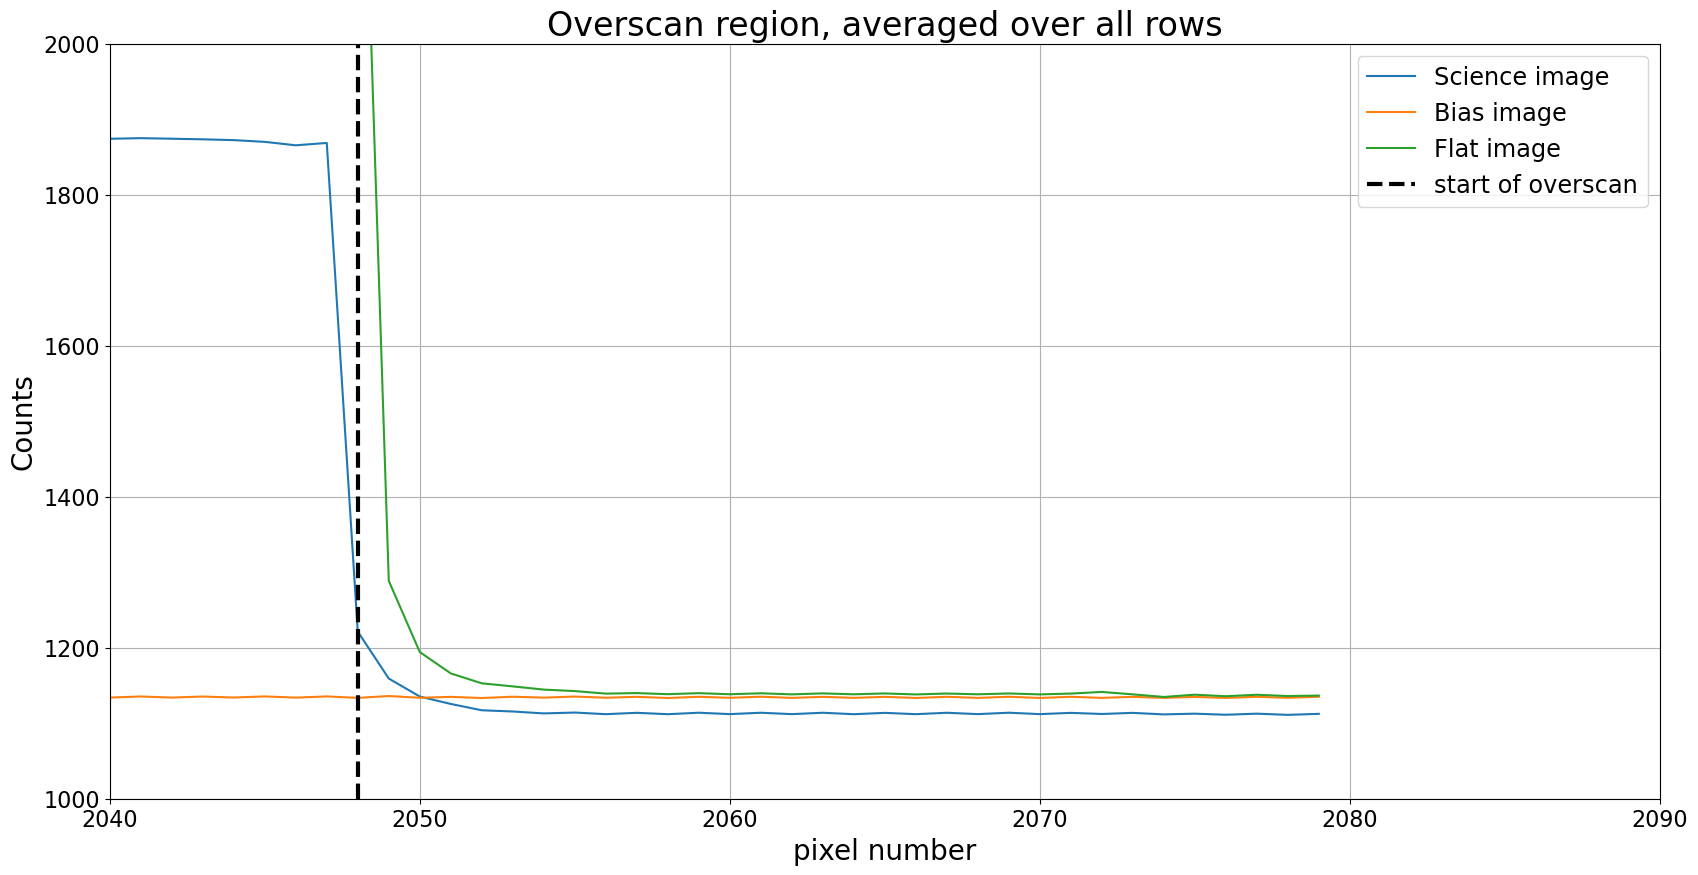

In [7]:
plt.figure(figsize=(20,10))
plt.plot(science_g_lfc.data.mean(axis=0), label='Science image')
plt.plot(bias_lfc.data.mean(axis=0), label='Bias image')
plt.plot(flat_g_lfc.data.mean(axis=0), label='Flat image')
plt.grid()
plt.axvline(x=2048, color='black', linewidth=3, linestyle='dashed', label='start of overscan')
plt.legend()
plt.ylim(1000, 2000)
plt.xlim(2040, 2090)
plt.xlabel('pixel number')
plt.ylabel('Counts')
plt.title('Overscan region, averaged over all rows')

<h1>1.6.1.1. Discusión del Ejemplo 1

El valor de conteo es casi uniforme en la región de sobreexploración.

Algunas fugas de luz desde la región de imágenes hacia la región de sobreexploración.

Hay una compensación entre la imagen científica y las otras dos imágenes, y quizás entre las imágenes planas y sesgadas.

La corriente oscura en esta cámara es esencialmente cero, por lo que la sobreexploración mide el sesgo.

<h1>1.6.1.1.1. ¿Qué pasa si no usas el overscan?

Nada particularmente malo. En el caso específico anterior, ignorar el overscan cambiará el nivel de fondo en la imagen científica en aproximadamente 20 cuentas, ya que la diferencia entre la región de overscan de la imagen científica es más baja que la overscan en las otras imágenes en aproximadamente 20 cuentas. Si, antes de hacer ciencia, se resta el fondo de esas imágenes, entonces este desplazamiento debería eliminarse con el fondo.

<h1>1.6.1.2. Conclusión para el caso 1

El overscan es útil, pero la región de overscan utilizable se extiende desde 2055 hasta el final del chip en lugar de desde 2048 hasta el final del chip como afirma el encabezado FITS. Dicho un poco diferente, el apropiado BIASSECpara estas imágenes es [2056:2080,1:4127]. (Tenga en cuenta que FITS comienza a numerarse en 1 en lugar de 0, por lo que 2055 en Python es 2056 en notación FITS).

Si la ciencia que está utilizando requiere conocer los conteos con una precisión de un conteo o dos, y modelar el fondo en la imagen científica no es una opción, considere usar el overscan.

<h1>1.6.2. Caso 2: Apogee Aspen CG16M con refrigeración termoeléctrica

In [14]:
therma_path = Path('example-thermo-electric')
kelt = CCDData.read(therma_path / 'kelt-16-b-S001-R001-C084-r.fit', unit='adu')
dark1000 = CCDData.read('dark-test-0002d1000.fit.bz2', unit='adu')
flat = CCDData.read(therma_path / 'AutoFlat-PANoRot-r-Bin1-006.fit', unit='adu')
master = CCDData.read('combined_bias_100_images.fit.bz2', unit='adu')

INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]


(900.0, 1300.0)

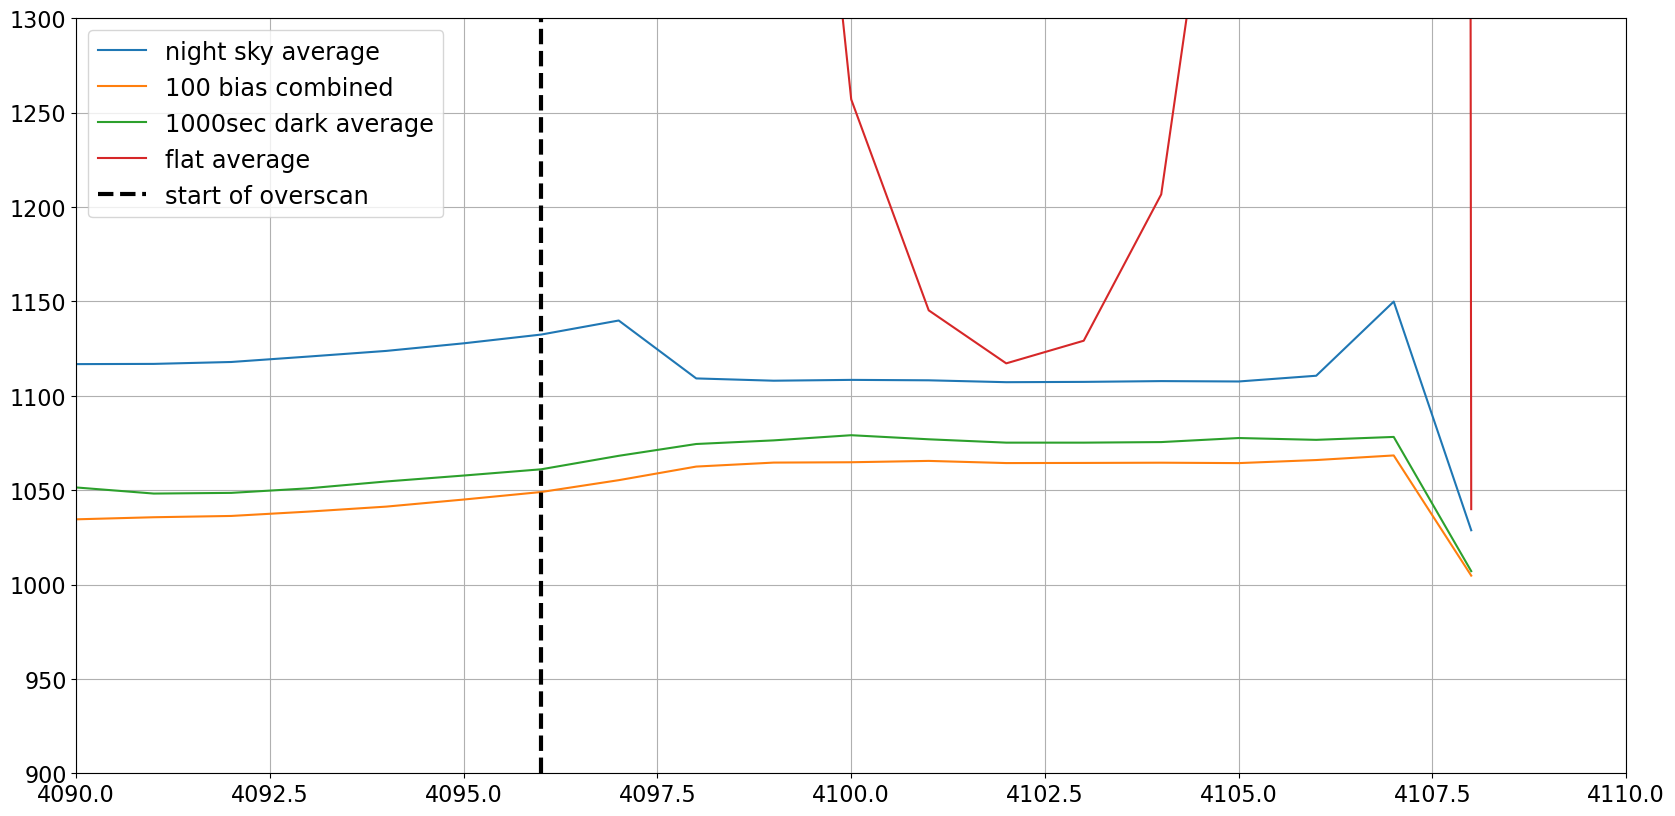

In [15]:
plt.figure(figsize=(20,10))

plt.plot(kelt.data.mean(axis=0), label='night sky average')
plt.plot(master.data.mean(axis=0), label='100 bias combined')
plt.plot(dark1000.data.mean(axis=0), label='1000sec dark average')
plt.plot(flat.data.mean(axis=0), label='flat average')

plt.grid()
plt.axvline(x=4096, color='black', linewidth=3, linestyle='dashed', label='start of overscan')
plt.legend()
plt.xlim(4090, 4110)
plt.ylim(900, 1300)

<h1>1.6.2.1. Discusión del Ejemplo 2
    

La cámara también tiene algunas características interesantes.

Los valores de conteo cambian bastante en la región de sobreexploración

Esto es más claro en el overscan para el plano. No solo se filtra luz en el overscan, el overscan parece ser principalmente una fuga de luz. Un píxel puede ser útil en el mejor de los casos.

Overscan incluye corriente oscura

La sobreexploración de la imagen oscura en la figura anterior es aproximadamente 10 cuentas más alta que las cuentas del sesgo. La corriente oscura de esta cámara es de aproximadamente 0,01 cuentas/píxel/segundo. Para una exposición oscura de 1000 segundos, los conteos oscuros esperados son alrededor de 10, que es la diferencia que se ve en el gráfico.

Hay una compensación entre las imágenes sesgadas/oscuras y científicas/planas

El desplazamiento en esta cámara es de aproximadamente 50 cuentas. Es lo suficientemente grande como para dudar en usar el overscan para esta cámara.

Los conteos de sobreexploración son más altos que los conteos de sesgo promedio

Tenga en cuenta que para la imagen de sesgo, los recuentos aumentan hasta el píxel donde comienza la sobreexploración y luego se nivelan. Resulta que los recuentos de sobreexploración son más altos que el promedio de los recuentos de polarización, por lo que restar la sobreexploración daría lugar a una imagen de polarización que es negativa. Esta es otra razón para sospechar de la región de sobreexploración de esta cámara.

<h1>
    1.6.2.2. Conclusión para el caso 2 

No utilice el overscan en este caso. Existen serios problemas con la fuga de luz y grandes diferencias en los conteos de sobreexploración entre las imágenes polarizadas y científicas.